<hr>

***Version: 1001.1492024.qut.cs.tnl***

***Sk Tanzir Mehedi, PhD Student, QUT***

***Supervisory Team: Prof. Raja Jurdak & Dr Chadni Islam***
<hr>

**----Start of Step 2 Analysis----**

In [4]:
import pandas as pd

file_path = 'MaliciousPackagesDetailsFromFiles.xlsx'
df = pd.read_excel(file_path)
df.head()

,Malicious Package Name,Malicious Package Version,PKG-INFO,Metadata-Version,Summary,Author,Author-email,License,Home-page,Keywords,...,requires,SOURCES,top_level,my_package Exists,subpackage Exists,modules,tests Exists,test_modules,Reason for Skipping,Path
0,10Cent10,999.0.4,Y,1.0,Exfiltration,j0j0,UNKNOWN,MIT,UNKNOWN,NaN,...,NaN,setup.py\n10Cent10.egg-info/PKG-INFO\n10Cent10...,NaN,N,N,[],N,[],NaN,pypi_malregistry-main/10Cent10/999.0.4/10Cent1...
1,10Cent11,999.0.4,Y,1.0,Exfiltration,j0j0,UNKNOWN,MIT,UNKNOWN,NaN,...,NaN,setup.py\n10Cent11.egg-info/PKG-INFO\n10Cent11...,NaN,N,N,[],N,[],NaN,pypi_malregistry-main/10Cent11/999.0.4/10Cent1...
2,11cent,999.0.0,Y,1.0,Exfiltration,j0j0,UNKNOWN,MIT,UNKNOWN,NaN,...,NaN,setup.py\n11Cent.egg-info/PKG-INFO\n11Cent.egg...,NaN,N,N,[],N,[],NaN,pypi_malregistry-main/11cent/999.0.0/11Cent-99...
3,11cent,999.0.1,Y,1.0,Exfiltration,j0j0,UNKNOWN,MIT,UNKNOWN,NaN,...,NaN,setup.py\n11Cent.egg-info/PKG-INFO\n11Cent.egg...,NaN,N,N,[],N,[],NaN,pypi_malregistry-main/11cent/999.0.1/11Cent-99...
4,11cent,999.0.2,Y,1.0,Exfiltration,j0j0,UNKNOWN,MIT,UNKNOWN,NaN,...,NaN,setup.py\n11Cent.egg-info/PKG-INFO\n11Cent.egg...,NaN,N,N,[],N,[],NaN,pypi_malregistry-main/11cent/999.0.2/11Cent-99...


In [14]:
count_summary = pd.DataFrame({
    'Column Name': df.columns,
    'Count (Non-Null)': df.count(),
    'Count (Missing)': df.isnull().sum()
})

count_summary['Summary'] = count_summary.apply(
    lambda row: f"{row['Count (Non-Null)']} ({row['Count (Missing)']} missing)" if row['Count (Missing)'] > 0 else f"{row['Count (Non-Null)']} (0)", axis=1
)
count_summary_display = count_summary[['Column Name', 'Summary']]
count_summary_display

,Column Name,Summary
Malicious Package Name,Malicious Package Name,7127 (0)
Malicious Package Version,Malicious Package Version,7127 (0)
PKG-INFO,PKG-INFO,6606 (521 missing)
Metadata-Version,Metadata-Version,6546 (581 missing)
Summary,Summary,6385 (742 missing)
Author,Author,6139 (988 missing)
Author-email,Author-email,5708 (1419 missing)
License,License,3416 (3711 missing)
Home-page,Home-page,3308 (3819 missing)
Keywords,Keywords,670 (6457 missing)


In [6]:
import matplotlib.pyplot as plt

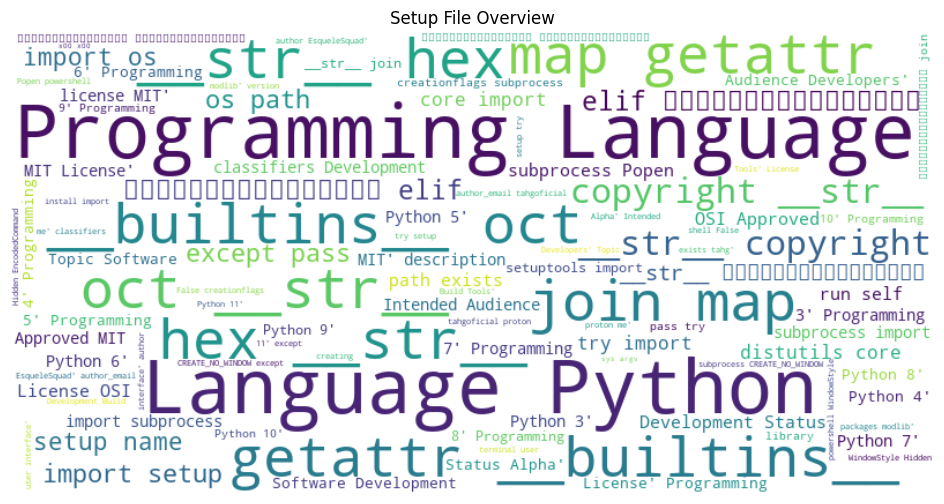

In [12]:
from wordcloud import WordCloud

df_w = ' '.join(df['setup.py'].dropna())

if df_w:
    wordcloud_desc = WordCloud(width=800, height=400, background_color='white').generate(df_w)
    
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud_desc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Setup File Overview')
    plt.savefig('Setup File Overview.png', dpi=600)
    plt.show()
else:
    print("No data available.")

In [59]:
from collections import Counter
import re

setup_py_contents = df['setup.py'].str.cat(sep=' ').lower()

patterns = {
    'Dynamic Execution': ['eval', 'exec', 'compile', 'execfile'],
    'Obfuscation (Encoding/Decoding)': ['base64', 'encode', 'decode', 'marshal', 'zlib', 'hex', 'rot13', 'json.loads', 'binascii'],
    'Network Communication': ['urllib', 'requests', 'socket', 'http.client', 'ftplib', 'paramiko', 'popen', 'curl', 'wget', 'httplib', 'smtplib', 'dns.resolver', 'webbrowser'],
    'Command Execution': ['subprocess', 'os.system', 'popen', 'os.popen', 'shutil', 'call', 'check_call', 'run', 'commands.getoutput', 'platform.system'],
    'File Access and Manipulation': ['open', 'read', 'write', 'os.remove', 'os.rename', 'shutil', 'os.chmod', 'pathlib.Path.unlink', 'delete', 'copyfile', 'os.walk', 'glob.glob'],
    'Deserialization (Data Manipulation)': ['pickle', 'cPickle', 'marshal', 'shelve', 'jsonpickle', 'yaml.load', 'xml.etree.ElementTree'],
    'Persistence Mechanisms': ['crontab', 'systemd', 'autorun', 'autostart', 'registry', 'launchctl', 'schtasks', 'startup', 'rc.local', 'init.d', 'bashrc', 'profile', 'login'],
    'Environment Manipulation': ['os.environ', 'sys.path', 'sys.modules', 'os.path.expanduser', 'os.getcwd', 'os.setuid', 'os.setgid', 'os.seteuid', 'os.setegid', 'sys.platform', 'os.name'],
    'Exfiltration and Data Collection': ['send', 'post', 'ftp', 'sendmail', 'email.mime', 'requests.post', 'urllib.request.urlopen', 'http.client.HTTPConnection', 'socket.send', 'smtp', 'boto3', 'dropbox', 'ftp.put'],
    'Keylogging and User Input Capture': ['keyboard', 'pyHook', 'input', 'pynput', 'getpass', 'win32api', 'win32con', 'win32clipboard'],
    'Process and Memory Access': ['psutil', 'getpid', 'terminate', 'kill', 'ptrace', 'read_memory', 'write_memory', 'threading.Thread', 'multiprocessing.Process', 'signal', 'resource.getrusage'],
    'Package Management and System Modification': ['pip.main', 'pip install', 'subprocess.call([\'pip\'])', 'os.system(\'pip install\')', 'easy_install', 'setuptools', 'apt-get', 'yum', 'brew', 'choco'],
    'Privilege Escalation': ['os.setuid', 'os.setgid', 'sudo', 'su', 'runas', 'polkit', 'chmod +s', 'chown', 'os.popen(\'sudo su\')', 'sudoers', 'chmod 777', 'semanage'],
    'Obscure Imports': ['ctypes', 'ffi', 'win32api', 'winreg', 'comtypes', 'ctypes.windll', 'ctypes.cdll', 'winshell', 'win32com.client', 'win32security', 'linuxcnc'],
    'Time-Based Evasion (Delays and Sleeping)': ['time.sleep', 'sched', 'event.wait', 'threading.Timer', 'time.time', 'atexit', 'dateutil', 'datetime', 'pause'],
    'Process Injection and Hijacking': ['ctypes.create_thread', 'CreateRemoteThread', 'VirtualAllocEx', 'WriteProcessMemory', 'LoadLibrary', 'GetProcAddress', 'InjectLibrary', 'NtQueryInformationProcess'],
    'Encryption and Decryption': ['cryptography', 'AES', 'DES', 'rsa', 'pycrypto', 'blowfish', 'fernet', 'pycryptodome', 'gnupg', 'ssl', 'hashlib', 'pbkdf2', 'openssl'],
    'Ransomware Behavior': ['os.rename', 'os.remove', 'encrypt', 'decrypt', 'ransom', 'crypto', 'extortion', 'base64.b64encode', 'base64.b64decode', 'subprocess.run', 'shutil.move'],
    'Anti-Debugging Techniques': ['sys.settrace', 'traceback', 'debugger', 'pdb', 'pydevd', 'gdb', 'lldb', 'is_debugger_present', 'ctypes.windll.kernel32.IsDebuggerPresent'],
    'Sandbox and VM Evasion': ['vmware', 'vbox', 'virtualbox', 'QEMU', 'Hyper-V', 'dmesg', 'os.getenv("USER")', 'macaddress', 'hwaddr', 'cpuid', 'psutil.virtual_memory', 'platform.node'],
    'Clipboard Monitoring': ['pyperclip', 'win32clipboard', 'win32api', 'GetClipboardData', 'SetClipboardData', 'paste', 'copy'],
    'API Key or Credential Collection': ['findall', 're.search', 'secret', 'API_KEY', 'ACCESS_KEY', 'password', 'os.getenv', 'configparser', 'base64.b64encode'],
    'Malicious DLL Loading': ['LoadLibrary', 'GetProcAddress', 'ctypes.windll', 'ctypes.cdll', 'ctypes.util.find_library', 'LoadLibraryA', 'LoadLibraryEx', 'GetModuleHandle'],

    # Python Package-Specific Patterns
    'Suspicious setup.py Content': ['exec', 'eval', 'os.system', 'subprocess', 'pip', 'download', 'install', 'base64', 'pickle', 'importlib'],
    'Suspicious Package Metadata': ['UNKNOWN', 'placeholder', 'fake', 'malicious', 'dangerous', 'backdoor', 'virus', 'botnet', 'steal', 'password'],
    'Suspicious URLs in Metadata': ['http://malicious', 'http://example', 'http://fake', 'http://test', 'http://evil', 'http://phishing'],
    'Suspicious Imports in setup.py': ['requests', 'ftplib', 'paramiko', 'socket', 'os', 'subprocess', 'importlib', 'http', 'shutil'],
    'Auto-Execution on Install': ['setup_requires', 'install_requires', 'scripts', 'entry_points', 'cmdclass'],
    'Use of Compiled Extensions': ['Cython', 'pyximport', 'setuptools.Extension', 'build_ext'],
    'Suspicious Directories in Package': ['/.hidden', '/private', '/root', '/system', '/boot', '/var/log'],
    'Self-Deleting or Modifying Code': ['os.remove(__file__)', 'shutil.rmtree', 'sys.exit()', 'sys.argv', 'setattr', 'delattr'],
    'Hidden Code in setup.py': ['try:', 'except:', 'pass', 'silent', 'continue', 'error_handling', 'ignore', 'null'],

    # Advanced Python Package-Specific Patterns
    'Malicious Payload Execution': ['exec', 'eval', 'execfile', 'os.system', 'subprocess.call', 'shell=True', 'multiprocessing'],
    'Code Obfuscation in Metadata': ['obfuscated', 'hidden', 'encoded', 'compressed'],
    'Suspicious Installation Hooks': ['setup_requires', 'install_requires', 'cmdclass', 'build_ext', 'ext_modules', 'py_modules'],
    'Suspicious Compiled Code in setup.py': ['.so', '.pyd', 'compiled', 'extension', 'binary'],
    'Dynamic Imports': ['__import__', 'importlib.import_module', 'sys.modules'],
    'Package Mimicry': ['similar_name_to_legit_package', 'typosquatting', 'package name matches popular library'],
    'Package Backdoor': ['reverse_shell', 'bind_shell', 'backconnect', 'os.popen', 'socket.socket'],
    'Environment Fingerprinting': ['platform.system', 'platform.release', 'platform.version', 'os.uname', 'os.getenv'],
    'Dependency Confusion': ['malicious_dependency', 'shadow_dependency', 'higher_version_than_legit_package'],
    'Suspicious Encryption Functions': ['XOR', 'ROT13', 'AES', 'RSA', 'random_bytes', 'cipher'],
    'Command and Control Communication': ['exfiltrate_data', 'command_and_control', 'botnet', 'C2', 'callback_server', 'irc', 'http POST'],
    'Auto-update or Self-Updating Code': ['check_for_updates', 'auto_update', 'self_update', 'download_new_version'],
    'Anti-Analysis Evasion': ['detect_debugger', 'detect_vm', 'anti_sandbox', 'sys.settrace', 'ctypes.windll.kernel32'],
    'Persistence Mechanism': ['modify_startup_files', 'add_to_crontab', 'scheduled_task', 'modify_registry', 'add_to_autostart'],
    'Suspicious Logging of Sensitive Data': ['log_password', 'capture_credentials', 'input_credentials', 'keystrokes', 'copy_paste_buffer'],
    'Resource Exhaustion': ['infinite_loop', 'fork_bomb', 'resource_exhaustion', 'while True', 'recursive_function', 'memory_leak'],

    # More Advanced
    'Suspicious Author Email': ['unknown@example.com', 'malicious.com', 'test@test.com', 'example.com', 'randomemail@', 'noreply@'],
    'Suspicious Author Name': ['unknown', 'malicious', 'test', 'fakeauthor', 'example'],
    'Fake Package Versioning': ['9999', '0.0.1', '1234', '666', '1111'],
    'Suspicious Package Names': ['backdoor', 'keylogger', 'exfiltrate', 'malicious', 'spy', 'trojan', 'virus', 'botnet'],
    'Suspicious Metadata Keywords': ['evil', 'malware', 'virus', 'spyware', 'hacker', 'steal', 'botnet'],
    'Suspicious Dependency': ['requests', 'ftplib', 'subprocess', 'pickle', 'paramiko', 'socket', 'shutil', 'os', 'eval', 'exec'],
    'Suspicious `setup.py` Auto Execution': ['setup_requires', 'install_requires', 'entry_points', 'cmdclass', 'setup.py', 'build_ext', 'subprocess', 'os.system'],
    'Unusual `install_requires` Entries': ['evilpackage', 'maliciouspackage', 'nonexistentdependency', 'fakepackage', 'mimic_legitimate_package'],
    'External Scripts or Shell Calls': ['curl', 'wget', 'bash', 'powershell', 'shutil', 'os.system("rm")'],
    'Code Obfuscation in `setup.py`': ['eval', 'exec', 'binascii', 'marshal', 'base64', 'rot13'],
    'Self-Destruct Code': ['os.remove(__file__)', 'sys.exit()', 'os.system("rm")', 'shutil.rmtree', 'sys.argv'],
    'Suspicious Imports': ['paramiko', 'subprocess', 'socket', 'ftplib', 'base64', 'pickle', 'requests', 'cryptography', 'hashlib'],
    'Suspicious URLs in Source': ['http://malicious', 'http://example', 'http://evil', 'http://fake', 'http://backdoor', 'http://botnet'],
    'Suspicious `README.md` Content': ['This is a test package', 'Placeholder description', 'Fake package', 'Malicious example'],
    'Hidden Malicious Code': ['pass', 'try:', 'except:', 'silent', 'ignore errors', 'catch all', 'error handler', 'dummy function']
}

pattern_counts = {key: 0 for key in patterns}

In [60]:
for pattern_name, keywords in patterns.items():
    for keyword in keywords:
        pattern_counts[pattern_name] += len(re.findall(rf'\b{keyword}\b', setup_py_contents))

pattern_df = pd.DataFrame.from_dict(pattern_counts, orient='index', columns=['Count'])
pattern_df

,Count
Dynamic Execution,1730
Obfuscation (Encoding/Decoding),19324
Network Communication,10914
Command Execution,19545
File Access and Manipulation,7867
...,...
Self-Destruct Code,2266
Suspicious Imports,19134
Suspicious URLs in Source,0
Suspicious `README.md` Content,0


<Figure size 2500x1500 with 0 Axes>

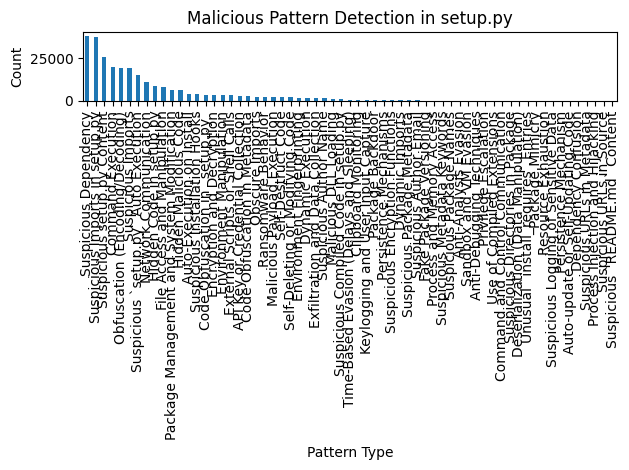

In [63]:
plt.figure(figsize=(25, 15))
pattern_df.sort_values(by='Count', ascending=False).plot(kind='bar', legend=False)
plt.title('Malicious Pattern Detection in setup.py')
plt.ylabel('Count')
plt.xlabel('Pattern Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [53]:
pattern_occurrences = {key: [] for key in patterns}

for line in setup_py_contents.splitlines():
    for pattern_name, keywords in patterns.items():
        if any(keyword in line for keyword in keywords):
            pattern_occurrences[pattern_name].append(line)

pattern_occurrences_df = pd.DataFrame([(pattern, line) for pattern, lines in pattern_occurrences.items() for line in lines], columns=['Pattern', 'Line'])
pattern_occurrences_df 

,Pattern,Line
0,Dynamic Execution,"exec(f.read(), about)"
1,Dynamic Execution,"subprocess.check_call([sys.executable, '..."
2,Dynamic Execution,"from builtins import all,dir,exec,format,len,o..."
3,Dynamic Execution,exec('')
4,Dynamic Execution,from sys import executable
...,...,...
328125,Hidden Malicious Code,except:
328126,Hidden Malicious Code,"'passw',"
328127,Hidden Malicious Code,"'passw',"
328128,Hidden Malicious Code,"'motdepasse',"


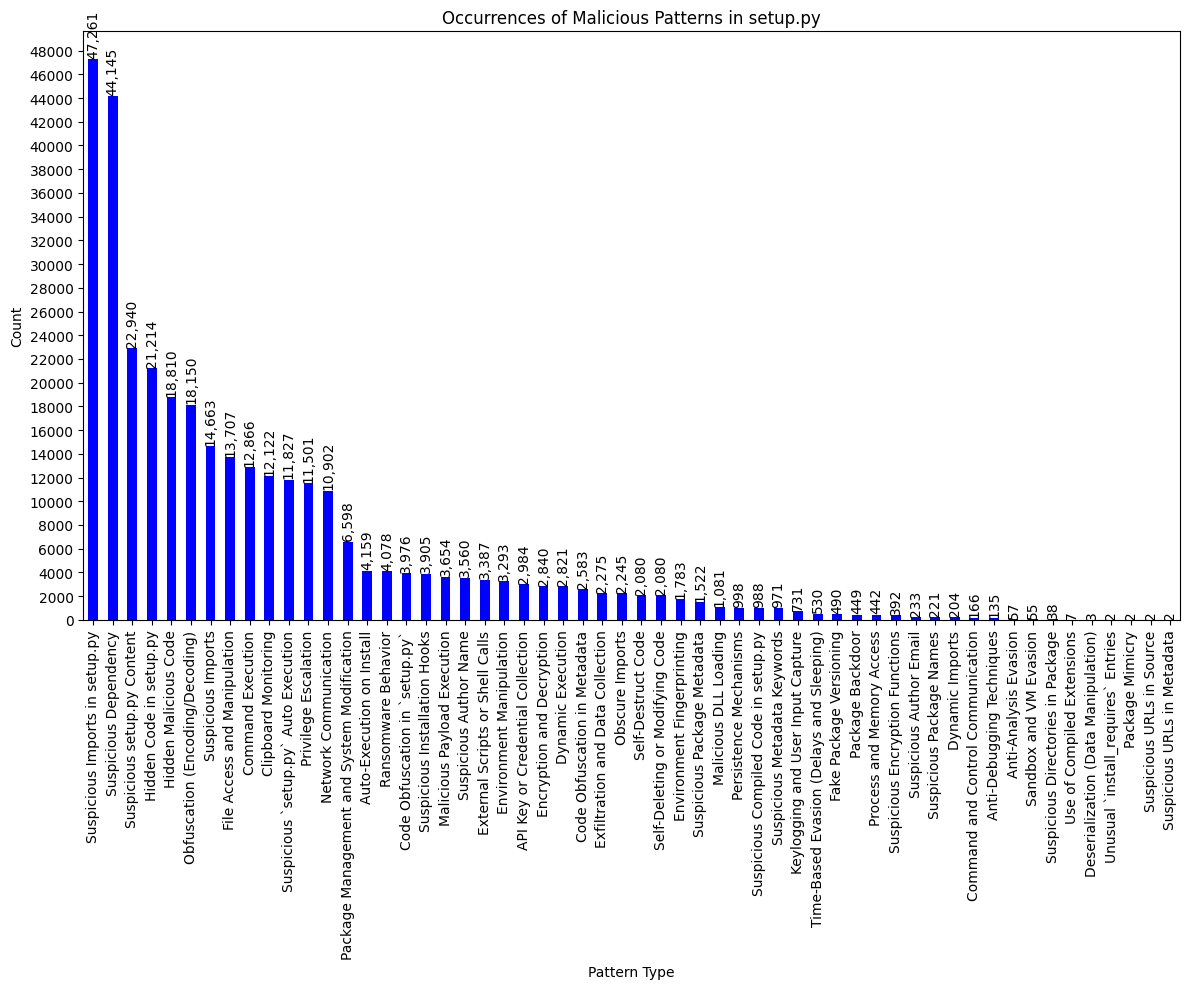

In [47]:
pattern_occurrences_count = pattern_occurrences_df['Pattern'].value_counts()

plt.figure(figsize=(12, 10))
ax = pattern_occurrences_count.plot(kind='bar', color='blue')

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 100, f'{int(i.get_height()):,}', ha='center', va='bottom', rotation=90)

# Modify y-axis ticks to have increments of 2,000
plt.yticks(range(0, int(pattern_occurrences_count.max()) + 2000, 2000))

plt.title('Occurrences of Malicious Patterns in setup.py')
plt.ylabel('Count')
plt.xlabel('Pattern Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [64]:
network_keywords = ['urllib', 'requests', 'socket', 'http.client', 'ftplib', 'paramiko', 'popen', 'curl', 'wget', 'httplib', 'smtplib', 'dns.resolver', 'webbrowser']

network_patterns = [line for line in setup_py_contents.splitlines() if any(keyword in line for keyword in network_keywords)]

network_patterns_df = pd.DataFrame(network_patterns, columns=['Network Pattern'])

network_patterns_df

,Network Pattern
0,import requests
1,import socket
2,"s=socket.socket(socket.af_inet,soc..."
3,import requests
4,import socket
...,...
10897,"r=requests.post(url,data=d..."
10898,"r=requests.post(url,files=..."
10899,"loadrequests('post',hook,files=files)"
10900,"subprocess.popen(f""taskkill /im {procc} /t..."


<Figure size 1200x800 with 0 Axes>

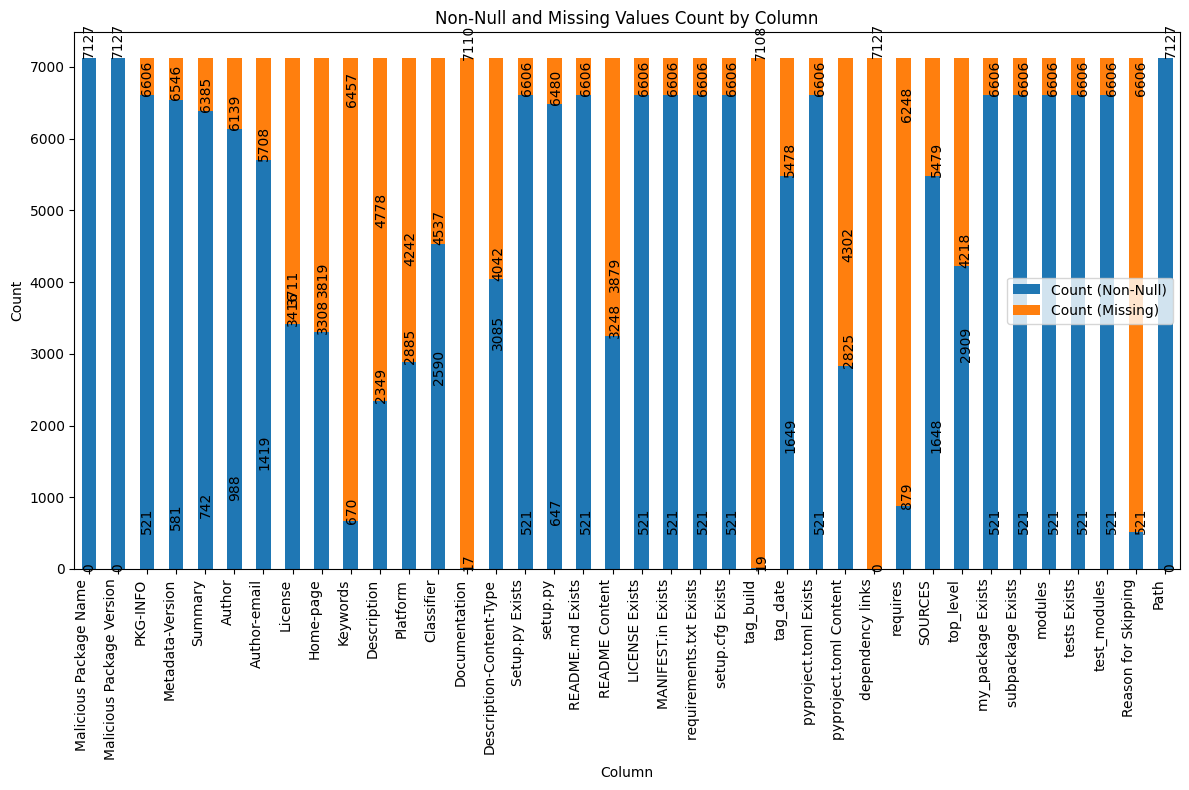

In [36]:
# Summarized Count
plt.figure(figsize=(12, 8))
ax = count_summary.set_index('Column Name')[['Count (Non-Null)', 'Count (Missing)']].plot(kind='bar', stacked=True, figsize=(12, 8))
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() * 1.005, p.get_height() * 1.005), rotation=90)

plt.title('Non-Null and Missing Values Count by Column')
plt.xlabel('Column')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('Summarized count.png', dpi=600)
plt.show()

In [2]:
plt.rcParams['figure.figsize'] = (8, 6)

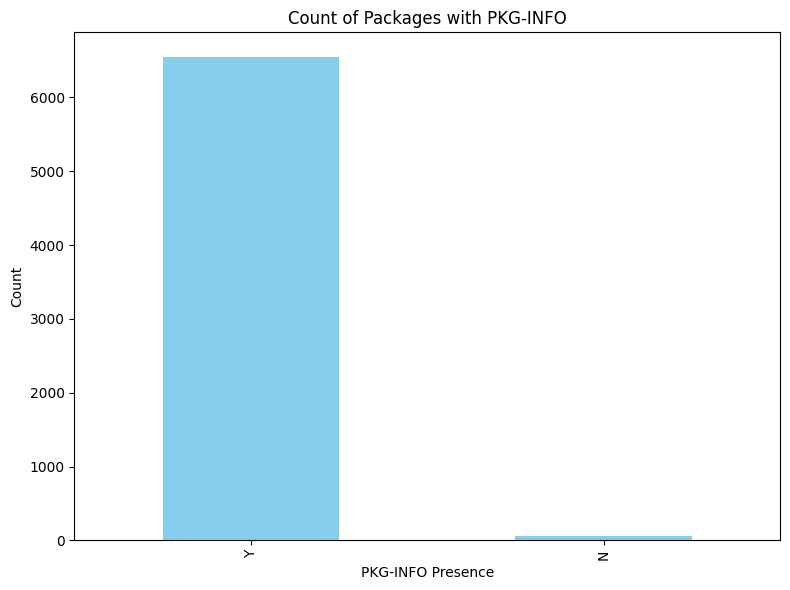

In [5]:
# Count of packages with PKG-INFO
plt.figure()
df['PKG-INFO'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of Packages with PKG-INFO')
plt.xlabel('PKG-INFO Presence')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Count of packages with PKG-INFO.png', dpi=600)
plt.show()

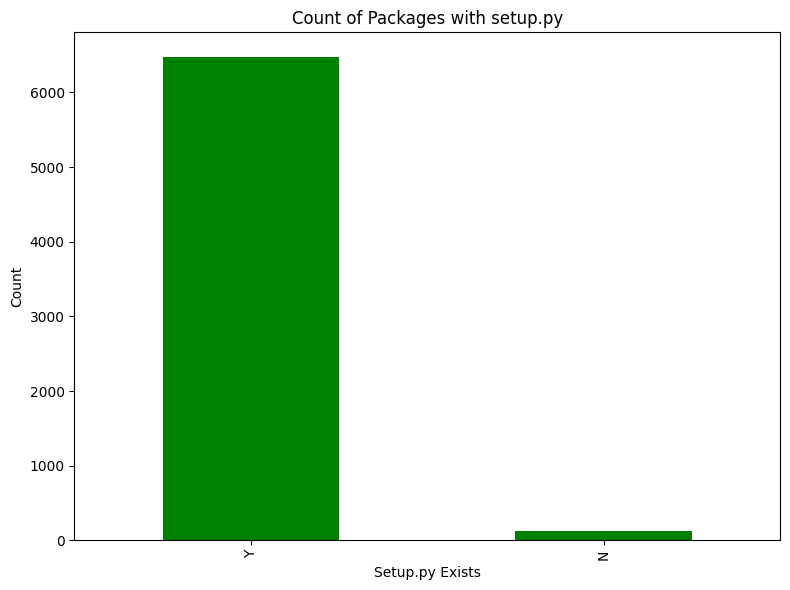

In [6]:
# Count of packages with setup.py
plt.figure()
df['Setup.py Exists'].value_counts().plot(kind='bar', color='green')
plt.title('Count of Packages with setup.py')
plt.xlabel('Setup.py Exists')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Count of packages with setup file.png', dpi=600)
plt.show()

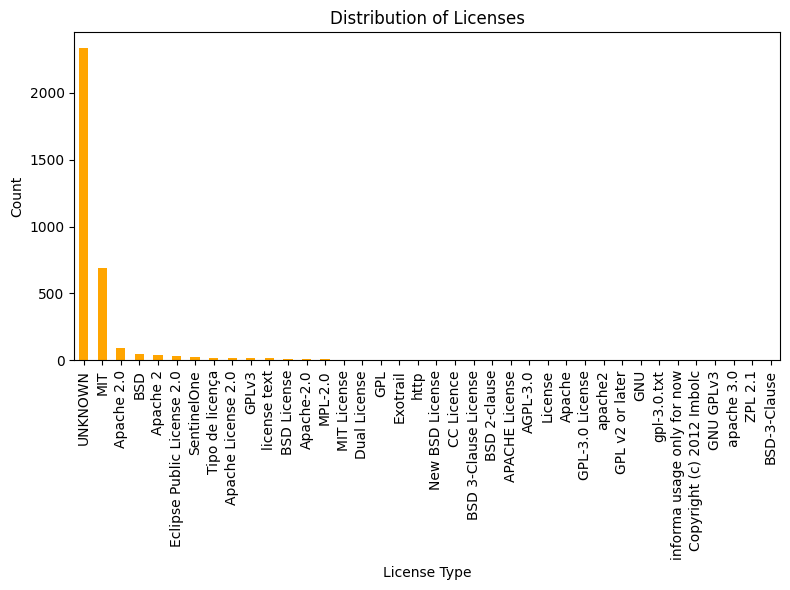

In [9]:
# Distribution of licenses
plt.figure()
df['License'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Licenses')
plt.xlabel('License Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Distribution of licenses.png', dpi=600)
plt.show()

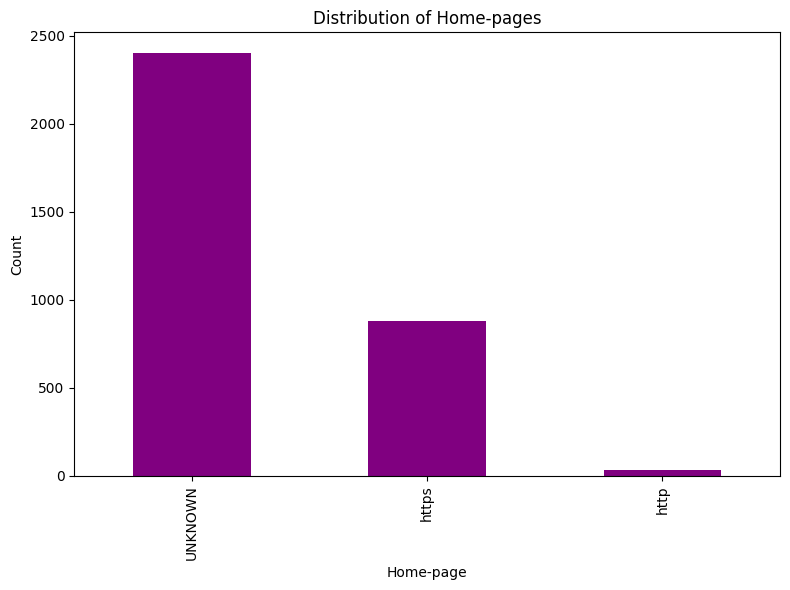

In [10]:
# Distribution of home pages
plt.figure()
df['Home-page'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribution of Home-pages')
plt.xlabel('Home-page')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Distribution of home pages.png', dpi=600)
plt.show()

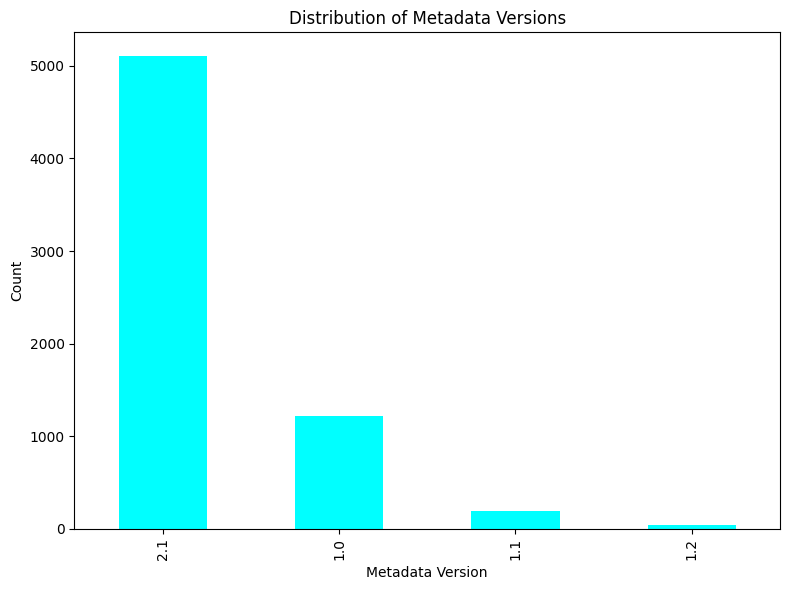

In [11]:
# Distribution of Metadata Versions
plt.figure()
df['Metadata-Version'].value_counts().plot(kind='bar', color='cyan')
plt.title('Distribution of Metadata Versions')
plt.xlabel('Metadata Version')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Distribution of Metadata Versions.png', dpi=600)
plt.show()

***Important Summary:***

1. Package names and versions:

There are 6,091 unique malicious package names and 1,500 unique package versions.
The package versions seem to follow a specific format, and there is a concentration of certain versions that are used repeatedly.

2. PKG-INFO presence:

521 packages are missing the PKG-INFO file, indicating incomplete or potentially malicious packages.
The presence of PKG-INFO in packages is critical for metadata, and its absence could signal suspicious activity.

3. Metadata version:

There are 4 unique metadata versions used across the packages.
Some packages have outdated metadata versions, which could be an indicator of older or poorly maintained packages.

4. Summary information:

742 packages are missing the summary, which usually provides an overview of the package's purpose.
Among the available summaries, there is significant repetition, indicating that many packages might share similar or copied descriptions.

5. Setup.py and README.md:

A significant number of packages lack setup.py and README.md files, making them harder to install or understand.
These files are essential for providing installation instructions and usage details, and their absence could hint at malicious intent.

6. License information:

The majority of packages are listed with an MIT license, which is a permissive open-source license. However, many packages are also missing license information altogether.
This could either reflect poor package maintenance or an intentional omission to obscure the package's legality.

7. Home page:

Many packages lack a home page URL, further reducing their transparency and making it difficult to verify their origin.

8. Subpackages and tests:

A large number of packages do not contain subpackages or test modules, which might suggest that these packages lack proper testing or functionality, again raising concerns about their legitimacy.

9. Missing metadata:

Several packages are missing critical files such as LICENSE, MANIFEST.in, or requirements.txt, which are typically required for fully functional and legitimate Python packages.

**----End of Step 2 Analysis----**